# SVM and Logistic on MNIST

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv("/Users/J.J./Desktop/mnist_train.csv") 
test_data = pd.read_csv("/Users/J.J./Desktop/mnist_test.csv")
test_Data = test_data.drop('label',axis=1)
print(train_data.shape)
print(test_data.shape)

(60000, 785)
(10000, 785)


1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: label, dtype: int64

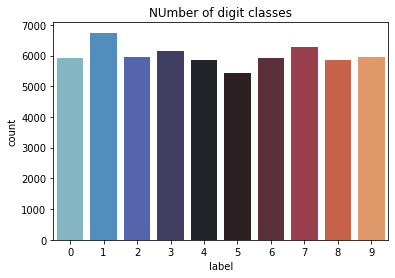

In [3]:
plt.plot(figure = (16,10))
g = sns.countplot( train_data["label"], palette = 'icefire')
plt.title('NUmber of digit classes')
train_data.label.astype('category').value_counts()

In [4]:
round(train_data.drop('label', axis=1).mean(), 2)


1x1      0.0
1x2      0.0
1x3      0.0
1x4      0.0
1x5      0.0
        ... 
28x24    0.0
28x25    0.0
28x26    0.0
28x27    0.0
28x28    0.0
Length: 784, dtype: float64

In [5]:
y = train_data['label']
z = test_data['label']

## Dropping the variable 'label' from X variable 
X = train_data.drop(columns = 'label')
T = test_data.drop(columns = 'label')

## Printing the size of data 
print(train_data.shape)

(60000, 785)


In [6]:
X = X/255.0
T = T/255.0
test_data = test_data/255.0

print("X:", X.shape)
print("T:", T.shape)
print("test_data:", test_data.shape)

X: (60000, 784)
T: (10000, 784)
test_data: (10000, 785)


In [7]:
from sklearn.preprocessing import scale
X_scaled = scale(X)
T_scaled = scale(T)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, train_size = 0.2 ,random_state = 10)

In [8]:
# linear model
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(T_scaled)


In [9]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=z, y_pred=y_pred), "\n")

# confusion matrix
print(metrics.confusion_matrix(y_true=z, y_pred=y_pred))

accuracy: 0.9167 

[[ 952    0    6    1    1   12    5    1    2    0]
 [   1 1119    3    2    1    2    3    1    3    0]
 [   6    5  944   23    9    2   10   10   22    1]
 [   8    0   24  904    1   34    1    7   27    4]
 [   1    1   10    1  929    1    7    4    2   26]
 [   7    1    9   45    7  780   13    1   25    4]
 [  11    3   15    0    9   22  894    2    2    0]
 [   2    9   18   13   13    0    0  936    1   36]
 [  14   11   17   34    7   32    9   11  829   10]
 [   7    6    4    8   58    5    1   31    9  880]]


In [10]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

non_linear_model = SVC(kernel='rbf')

non_linear_model.fit(X_train, y_train)

y_pred1 = non_linear_model.predict(T_scaled)

In [11]:
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=z, y_pred=y_pred1), "\n")

# confusion matrix
print(metrics.confusion_matrix(y_true=z, y_pred=y_pred1))

accuracy: 0.9429 

[[ 955    0    9    1    0    3    9    2    1    0]
 [   0 1123    5    1    1    1    2    1    1    0]
 [   6    1  981    4    6    0    5   12   17    0]
 [   0    1   17  945    0   13    1   11   18    4]
 [   1    1   18    0  926    1    8    6    3   18]
 [   5    0   11   23    3  819   13    4    9    5]
 [   9    2   12    0    6    9  919    0    1    0]
 [   0   11   34    5    2    1    0  951    0   24]
 [   5    4   19   12    4   13   10    9  893    5]
 [   4    8   17   15   21    2    0   19    6  917]]


In [23]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(C=1e5,
                         multi_class='multinomial',
                         penalty='l2', solver='sag', tol=0.1)
logistic_model.fit(X_scaled, y)

y_pred2 = logistic_model.predict(T_scaled)

In [24]:
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=z, y_pred=y_pred2), "\n")

# confusion matrix
print(metrics.confusion_matrix(y_true=z, y_pred=y_pred2))

accuracy: 0.9 

[[ 956    0    1    1    0    9    8    2    3    0]
 [   0 1105    3    3    1    3    4    0   16    0]
 [  16   14  889   23   15    1   11   23   36    4]
 [   6    5   20  895    1   35    6   17   17    8]
 [   2    7    4    0  919    2   11    2    3   32]
 [  16    4    4   38   17  745   18   15   28    7]
 [  15    6   10    0   12   20  890    2    3    0]
 [   2   24   20    5   10    0    1  929    1   36]
 [  12   23    9   32   19   35   11   18  799   16]
 [  16    8    3   14   49    8    0   34    4  873]]
